# Install fast ai

In [6]:
!pip install -Uqq fastai

In [3]:
from fastai.vision.all import *


In [4]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [5]:
from fastbook import *
from fastai.vision.widgets import *

# Test out duck duck go for image downloading



In [7]:
fastbook.search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [8]:
truck_images = fastbook.search_images_ddg('truck')
len(truck_images)

200

In [9]:
car_images = search_images_ddg('car')
len(car_images)

200

# Use duck duck go to search for training data

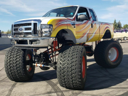

In [10]:
dest = 'images/test_truck.jpg'
download_url(truck_images[0], dest)
image = Image.open(dest)
image.to_thumb(128,128)

In [11]:
vehicle_types = ['car','truck']
search_terms = ['car sedan coup -truck -wallpaper -wallpapers -background -backgrounds', 'truck -car -pickup']
path = Path('vehicles')

In [12]:
if not path.exists():
    path.mkdir()
    for index, vehicle in enumerate(vehicle_types):
        results = search_images_ddg(search_terms[index])
        dest = (path/vehicle)
        dest.mkdir(exist_ok=True)
        download_images(dest, urls=results)

In [13]:
fns = get_image_files(path)
fns

(#359) [Path('vehicles/truck/57102237-05d4-4960-9498-11185e335d4d.jpg'),Path('vehicles/truck/a0fa93a7-134d-4cf0-a0c2-03669e9a535a.png'),Path('vehicles/truck/4d413d0d-dfd3-4823-80f9-083d1f89f6bb.jpg'),Path('vehicles/truck/40315aad-01a9-43ef-a2fb-48e856ad5e72.jpg'),Path('vehicles/truck/6f4ea496-e5fa-47c5-9377-fd02cb66b935.png'),Path('vehicles/truck/9812233b-0cfb-45ff-b699-32c19de96b97.jpg'),Path('vehicles/truck/01e37850-fed8-41dc-9df2-502e152a68d1.jpg'),Path('vehicles/truck/e8a2cb86-84a7-4437-8c5c-f3f6c3c867d6.png'),Path('vehicles/truck/d320de02-2ba9-432b-8af0-9a47327c1e51.jpg'),Path('vehicles/truck/a5b8cbe8-1c01-4c03-b86b-bd9c8692f439.jpg')...]

In [14]:
failed = verify_images(fns)
failed

(#7) [Path('vehicles/truck/e86e0e6e-262d-4d84-a87a-82bc09b97df9.jpg'),Path('vehicles/truck/7847947e-dc9e-4601-8c3e-12bd2dc7214c.jpg'),Path('vehicles/truck/d86032bd-a119-4fb4-ac81-51110c2b96fa.jpg'),Path('vehicles/truck/e4a53905-7a62-4776-8d8d-060aac48a74f.jpg'),Path('vehicles/truck/c97d3926-28f5-4de4-9b50-dfd4add80405.jpg'),Path('vehicles/car/6ffb0c9b-fa11-4203-9ec1-54e959a06bc3.jpg'),Path('vehicles/car/7c37b86a-ed0e-4ce7-890f-789eaf06347c.jpg')]

In [15]:
failed.map(Path.unlink);

Create the data loader

In [16]:
vehicles = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

Augment the training data with cropping, rotation, scaling of source images

In [17]:
vehicles = vehicles.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms(mult=2))

# Train the model

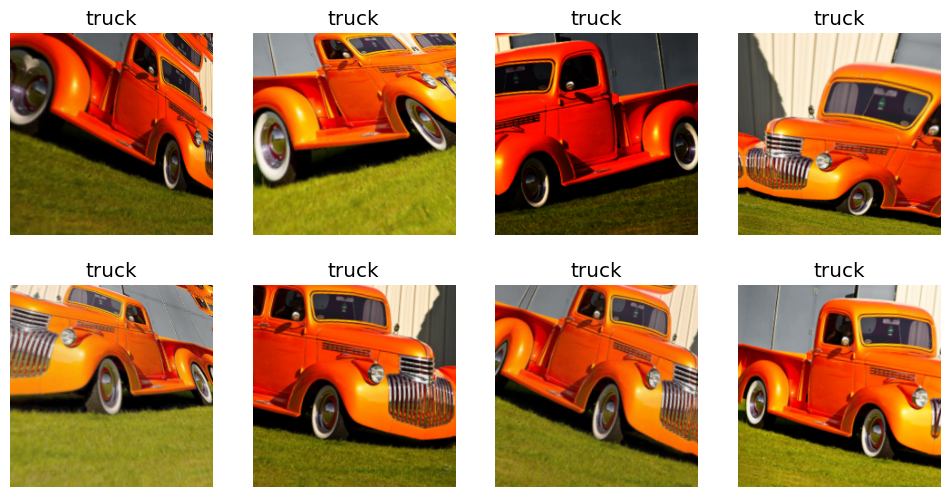

In [18]:
data_loaders = vehicles.dataloaders(path)
data_loaders.train.show_batch(max_n=8, nrows=2, unique=True)

In [19]:
data_loaders = vehicles.dataloaders(path)
learn = vision_learner(data_loaders, resnet18, metrics=error_rate)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 184MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.897263,0.178316,0.071429,00:29


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,error_rate,time
0,0.414416,0.133356,0.071429,00:30
1,0.366682,0.078542,0.042857,00:28
2,0.319796,0.053120,0.028571,00:29
3,0.297332,0.053986,0.028571,00:28


/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes sh

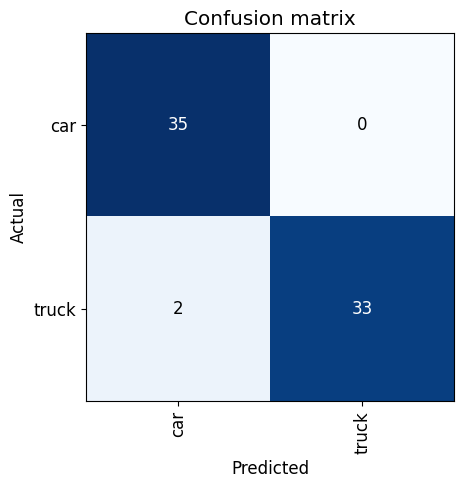

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

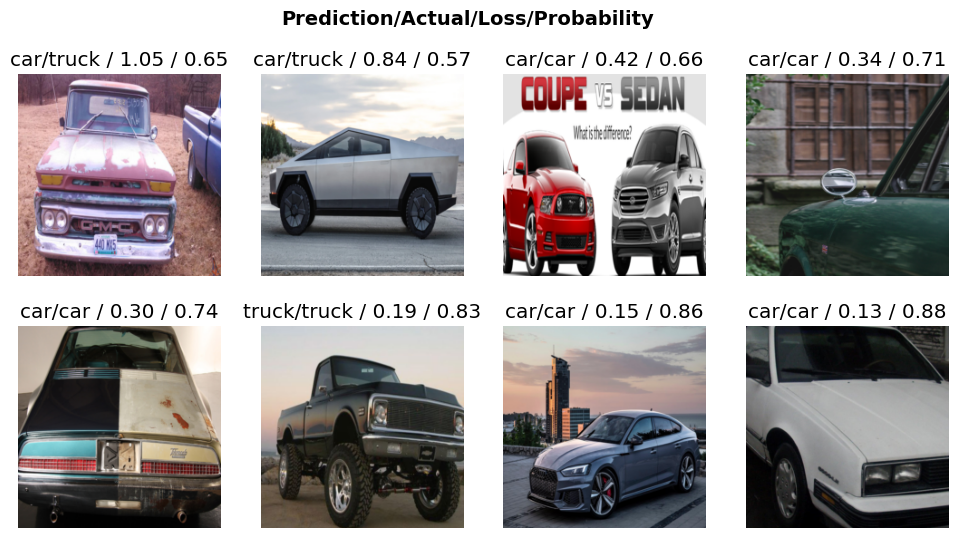

In [21]:
interp.plot_top_losses(8, nrows=2)

In [22]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
for idx in cleaner.delete():
  print(cleaner.fns[idx])
  #cleaner.fns[idx].unlink()


# Export Model

In [24]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

# Inference

In [25]:
learn_inf = load_learner(path/'export.pkl')

Simple Web App to Test our Model

In [26]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [28]:
img = PILImage.create(btn_upload.data[-1])
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [30]:
pred,pred_idx,probs = learn_inf.predict(img)
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: truck; Probability: 0.9999')

In [32]:
btn_run = widgets.Button(description='Classify')
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)
btn_run

Button(description='Classify', style=ButtonStyle())

In [33]:
btn_upload = widgets.FileUpload()

In [34]:
VBox([widgets.Label('Select your vehicle!'), 
      btn_upload, btn_run, out_pl, lbl_pred])